array([[<Axes: title={'center': 'theta_t'}>,
        <Axes: title={'center': 'theta_t'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

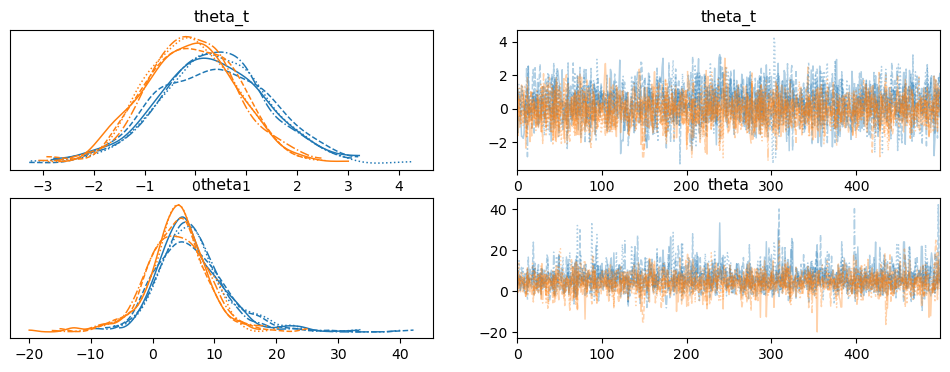

In [1]:
import arviz as az
data = az.load_arviz_data('non_centered_eight')
coords = {'school': ['Choate', 'Lawrenceville']}
az.plot_trace(data, var_names=('theta'), filter_vars="like", coords=coords)

In [2]:
data

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

In [4]:
import pymc as pm
import arviz as az

print("PyMC version:", pm.__version__)
print("ArviZ version:", az.__version__)


PyMC version: 5.20.0
ArviZ version: 0.20.0


In [6]:
import pymc as pm
import arviz as az

# Define the model
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=[1.0, 2.0, 3.0])

    # Sample from the posterior
    trace = pm.sample(1000)

# Convert to ArviZ InferenceData
idata = az.from_pymc3(trace)

# Visualize the results
az.plot_trace(idata)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


AttributeError: module 'arviz' has no attribute 'from_pymc3'

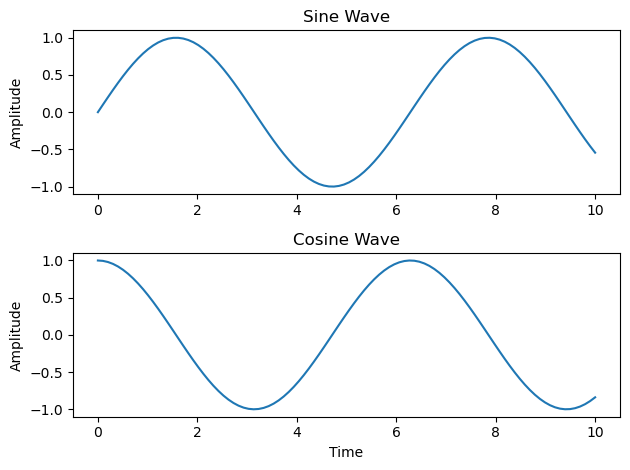

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1)

# Plotting on the first subplot
ax1.plot(x, y1)
ax1.set_title('Sine Wave')
ax1.set_ylabel('Amplitude')

# Plotting on the second subplot
ax2.plot(x, y2)
ax2.set_title('Cosine Wave')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()

# Show the plot
plt.show()
